In [33]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

### Scenario 1

In [34]:
def equations_1(y,t, m, k, w):
    x,v = y
    dxdt = v
    dvdt = -(k*x + w*v) / m
    return [dxdt, dvdt]

In [35]:
m = 1.0     # Mass (kg)
k = 10.0    # Spring constant (N/m)
w = 0.5     # Damping constant (Ns/m)
v0 = 5.0    # Initial velocity (m/s)

x0 = 0.0    # Initial displacement (m)
y0 = [x0, v0]   # Initial condition vector

t = np.linspace(0, 25, 1000) # Time vector


In [36]:
y = odeint(equations_1, y0, t, args=(m, k, w))

x= y[:,0]
v= y[:,1]

a = -(k*x + w*v) / m

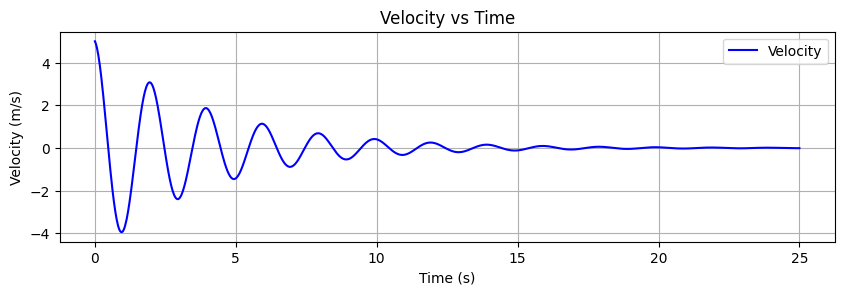

In [37]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, v, 'b-', label='Velocity')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs Time')
plt.grid(True)
plt.legend()

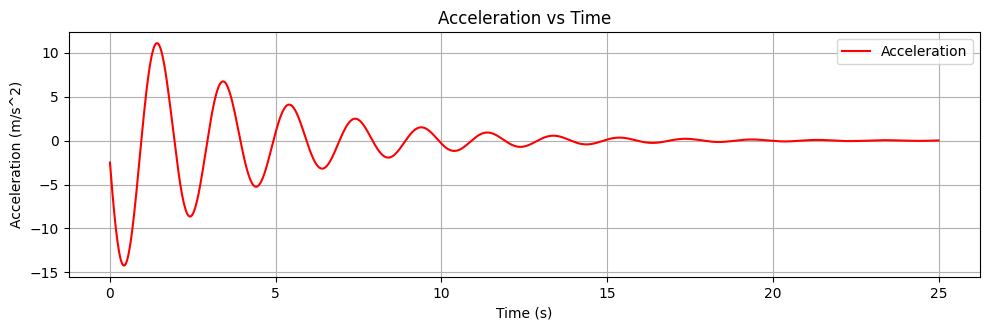

In [38]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, a, 'r-', label='Acceleration')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Acceleration vs Time')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### Scenario 2

In [39]:
def model(y, t, m1, m2, k1, k2, w):
    x1, v1, x2, v2 = y
    dx1dt = v1
    dv1dt = -(k1*x1 + k2*(x1 - x2) + w*v1) / m1
    dx2dt = v2
    dv2dt = -(k2*(x2 - x1)) / m2
    return [dx1dt, dv1dt, dx2dt, dv2dt]

In [44]:
m1 = 1.0    # Mass of block 1 (kg)
m2 = 1.0    # Mass of block 2 (kg)
k1 = 10.0   # Spring constant for block 1 (N/m)
k2 = 5.0    # Spring constant for block 2 (N/m)
w = 0.5     # Damping constant (Ns/m)
v0 = 5.0    # Initial velocity for both blocks (m/s)

x1_0 = 0.0  # Initial displacement of block 1 (m)
v1_0 = 0   # Initial velocity of block 1 (m/s)
x2_0 = 0.0  # Initial displacement of block 2 (m)
v2_0 = v0   # Initial velocity of block 2 (m/s)
y0 = [x1_0, v1_0, x2_0, v2_0]   # Initial condition vector

t = np.linspace(0, 50, 1000) # Time vector

In [45]:
y = odeint(model, y0, t, args=(m1, m2, k1, k2, w))
x1_0 = y[:,0]
v1_0 = y[:,1]
x2_0 = y[:,2]
v2_0 = y[:,3]

a1 = -(k1*x1_0 + k2*(x1_0 - x2_0) + w*v1_0) / m1
a2 = -(k2*(x2_0 - x1_0)) / m2

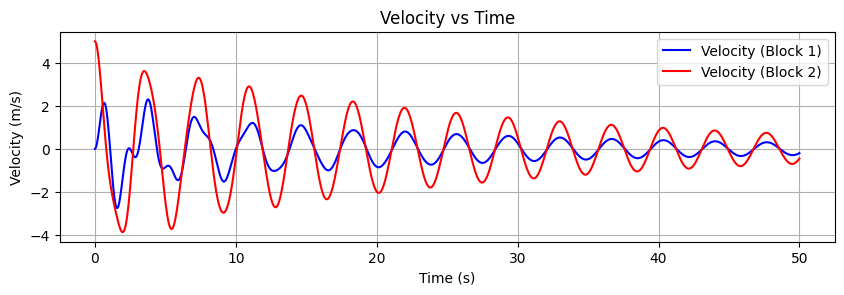

In [46]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, v1_0, 'b-', label='Velocity (Block 1)')
plt.plot(t, v2_0, 'r-', label='Velocity (Block 2)')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs Time')
plt.grid(True)
plt.legend()

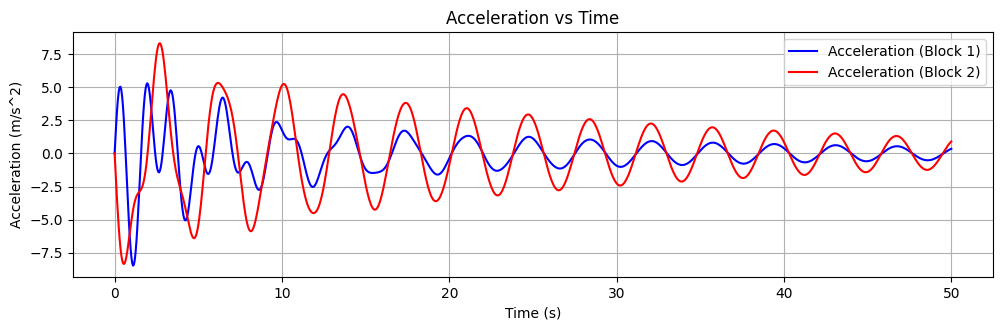

In [48]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 2)
plt.plot(t, a1, 'b-', label='Acceleration (Block 1)')
plt.plot(t, a2, 'r-', label='Acceleration (Block 2)')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Acceleration vs Time')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### Scenario 3:
when k is a function of x or t

In [66]:
def equations_2(y,t, m, k0, w):
    x,v = y
    dxdt = v
    k = k0 * np.sin(x)
    dvdt = -(k*x + w*v) / m
    return [dxdt, dvdt]

In [67]:
m = 1.0     # Mass (kg)
k0 = 10.0    # Spring constant (N/m)
w = 0.5     # Damping constant (Ns/m)
v0 = 5.0    # Initial velocity (m/s)

x0 = 0.0    # Initial displacement (m)
y0 = [x0, v0]   # Initial condition vector

t = np.linspace(0, 25, 1000) # Time vector

In [68]:
y = odeint(equations_2, y0, t, args=(m, k0, w))

x= y[:,0]
v= y[:,1]
k = k0 * np.sin(x)

a = -(k*x + w*v) / m

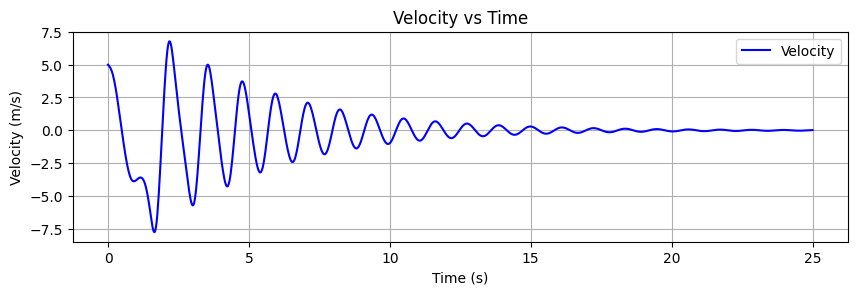

In [69]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, v, 'b-', label='Velocity')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs Time')
plt.grid(True)
plt.legend()

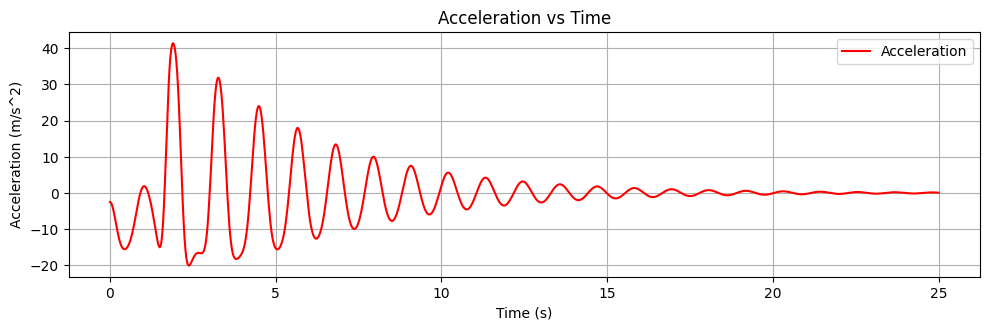

In [70]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, a, 'r-', label='Acceleration')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Acceleration vs Time')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()